In [1]:
# Library loading
%matplotlib inline

import pandas as pd # manipulate dataframes
import matplotlib.pyplot as plt # plotting
import matplotlib
import numpy as np
import torch, time

from sklearn.metrics import mean_squared_error
import h5py

import neuravi

In [2]:
print("CUDA AVAILABLE? ",torch.cuda.is_available())

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
      
device = get_default_device()
print(device)


CUDA AVAILABLE?  False
cpu


In [3]:
### Load dataset

path_data = "./data/DataSet_0p20val.hdf5"

path_raman = "./data/NKAS_DataSet.hdf5"
path_density = "./data/NKAS_density.hdf5"
path_fragloss = "./data/X_FragLoss.hdf5"

f = h5py.File(path_data, 'r')
# List all groups
X_columns = f['X_columns'].value

# Entropy dataset
X_entropy_train = f["X_entropy_train"].value
y_entropy_train = f["y_entropy_train"].value

X_entropy_valid = f["X_entropy_valid"].value
y_entropy_valid = f["y_entropy_valid"].value

X_entropy_test = f["X_entropy_test"].value
y_entropy_test = f["y_entropy_test"].value

# Viscosity dataset
X_train = f["X_train"].value
y_train = f["y_train"].value

X_valid = f["X_valid"].value
y_valid = f["y_valid"].value

X_test = f["X_test"].value
y_test = f["y_test"].value

# Tg dataset
X_tg_train = f["X_tg_train"].value
X_tg_valid= f["X_tg_valid"].value
X_tg_test = f["X_tg_test"].value

y_tg_train = f["y_tg_train"].value
y_tg_valid = f["y_tg_valid"].value
y_tg_test = f["y_tg_test"].value

f.close()

# Raman dataset
f = h5py.File(path_raman, 'r')
X_raman_train = f["X_raman_train"].value
y_raman_train = f["y_raman_train"].value
X_raman_valid = f["X_raman_test"].value
y_raman_valid = f["y_raman_test"].value
f.close()

# Density dataset
f = h5py.File(path_density, 'r')
X_density_train = f["X_density_train"].value
X_density_valid = f["X_density_valid"].value
X_density_test = f["X_density_test"].value

y_density_train = f["y_density_train"].value
y_density_valid = f["y_density_valid"].value
y_density_test = f["y_density_test"].value
f.close()

# Loading fake dataset
#X_FragLoss_train = f["X_train"]
#ap_FragLoss_train = ap_calc(X_FragLoss_train)
#b_FragLoss_train = b_calc(X_FragLoss_train)

#X_FragLoss_valid = f["X_valid"]
#ap_FragLoss_valid = ap_calc(X_FragLoss_valid)
#b_FragLoss_valid = b_calc(X_FragLoss_valid)

# grabbing number of Raman channels
nb_channels_raman = y_raman_valid.shape[1]

# preparing data

# viscosity
x_visco_train = torch.FloatTensor(X_train[:,0:4]).to(device)
T_visco_train = torch.FloatTensor(X_train[:,4].reshape(-1,1)).to(device)
y_visco_train = torch.FloatTensor(y_train[:,0].reshape(-1,1)).to(device)

x_visco_valid = torch.FloatTensor(X_valid[:,0:4]).to(device)
T_visco_valid = torch.FloatTensor(X_valid[:,4].reshape(-1,1)).to(device)
y_visco_valid = torch.FloatTensor(y_valid[:,0].reshape(-1,1)).to(device)

# entropy
x_entro_train = torch.FloatTensor(X_entropy_train[:,0:4]).to(device)
y_entro_train = torch.FloatTensor(y_entropy_train[:,0].reshape(-1,1)).to(device)

x_entro_valid = torch.FloatTensor(X_entropy_valid[:,0:4]).to(device)
y_entro_valid = torch.FloatTensor(y_entropy_valid[:,0].reshape(-1,1)).to(device)

# tg
x_tg_train = torch.FloatTensor(X_tg_train[:,0:4]).to(device)
y_tg_train = torch.FloatTensor(y_tg_train.reshape(-1,1)).to(device)

x_tg_valid = torch.FloatTensor(X_tg_valid[:,0:4]).to(device)
y_tg_valid = torch.FloatTensor(y_tg_valid.reshape(-1,1)).to(device)

# Density
x_density_train = torch.FloatTensor(X_density_train[:,0:4]).to(device)
y_density_train = torch.FloatTensor(y_density_train.reshape(-1,1)).to(device)

x_density_valid = torch.FloatTensor(X_density_valid[:,0:4]).to(device)
y_density_valid = torch.FloatTensor(y_density_valid.reshape(-1,1)).to(device)

# Raman
x_raman_train = torch.FloatTensor(X_raman_train[:,0:4]).to(device)
y_raman_train = torch.FloatTensor(y_raman_train).to(device)

x_raman_valid = torch.FloatTensor(X_raman_valid[:,0:4]).to(device)
y_raman_valid = torch.FloatTensor(y_raman_valid).to(device)


# testing shapes
print("Visco shape")
print(x_visco_train.shape)
print(T_visco_train.shape)
print(y_visco_train.shape)

print("Entropy shape")
print(x_entro_train.shape)
print(y_entro_train.shape)

print("Tg shape")
print(x_tg_train.shape)
print(y_tg_train.shape)

print("Density shape")
print(x_density_train.shape)
print(y_density_train.shape)

print("Raman shape")
print(x_raman_train.shape)
print(y_raman_train.shape)

# testing device
print("Visco device")
print(x_visco_train.device)
print(T_visco_train.device)
print(y_visco_train.device)

print("Entropy device")
print(x_entro_train.device)
print(y_entro_train.device)

print("Tg shape")
print(x_tg_train.device)
print(y_tg_train.device)

print("Density device")
print(x_density_train.device)
print(y_density_train.device)

print("Raman device")
print(x_raman_train.device)
print(y_raman_train.device)

Visco shape
torch.Size([1010, 4])
torch.Size([1010, 1])
torch.Size([1010, 1])
Entropy shape
torch.Size([311, 4])
torch.Size([311, 1])
Tg shape
torch.Size([457, 4])
torch.Size([457, 1])
Density shape
torch.Size([109, 4])
torch.Size([109, 1])
Raman shape
torch.Size([31, 4])
torch.Size([31, 850])
Visco device
cpu
cpu
cpu
Entropy device
cpu
cpu
Tg shape
cpu
cpu
Density device
cpu
cpu
Raman device
cpu
cpu


In [5]:
# Declare model
neuralmodel = neuravi.model(4,100,3,nb_channels_raman,p_drop=0.3) 
neuralmodel.load_state_dict(torch.load("/home/charles/GoogleDrive/model.tch"))
neuralmodel.eval()

model(
  (relu): ReLU()
  (dropout): Dropout(p=0.3)
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (out_thermo): Linear(in_features=100, out_features=4, bias=True)
  (out_raman): Linear(in_features=100, out_features=850, bias=True)
)

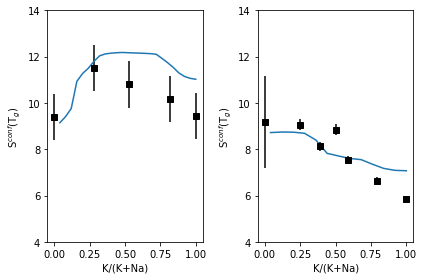

In [6]:
na2o = np.arange(0.,0.25,0.01)
k2o = 0.25-na2o
sio2 = np.ones(len(na2o))*0.75
al2o3 = np.zeros(len(na2o))

X_visu_ = np.vstack([sio2,al2o3,na2o,k2o]).T
X_visu_.shape

plt.subplot(1,2,1)
plt.plot(X_visu_[:,3]/(X_visu_[:,2]+X_visu_[:,3]),neuralmodel.sctg(torch.Tensor(X_visu_).to(device)).cpu().detach().numpy(),label="NN model")

plt.xlabel("K/(K+Na)")
plt.ylabel("S$^{conf}$(T$_g$)")
plt.ylim(4,14)

plt.errorbar(np.array([0,0.28,0.53,0.82,1.0]),np.array([32.91,40.31,37.81,35.59,32.99])/7.0*2.0,
    yerr = 1.0, fmt="ks",
    label="Richet, 1984")

plt.subplot(1,2,2)
na2o = np.arange(0.,0.125,0.01)
k2o = 0.125-na2o
sio2 = np.ones(len(na2o))*0.75
al2o3 = np.ones(len(na2o))*0.125

X_visu_ = np.vstack([sio2,al2o3,na2o,k2o]).T
X_visu_.shape

plt.plot(X_visu_[:,3]/(X_visu_[:,2]+X_visu_[:,3]),neuralmodel.sctg(torch.Tensor(X_visu_).to(device)).cpu().detach().numpy(),label="NN model")

plt.xlabel("K/(K+Na)")
plt.ylabel("S$^{conf}$(T$_g$)")
plt.ylim(4,14)

plt.errorbar(np.array([0,0.25,0.39,0.50,0.59,0.79,1.00]),
             np.array([9.17,9.06,8.12,8.84,7.54,6.63,5.83]),
    yerr = np.array([2.,0.23,0.20,0.23,0.18,0.15,0.11]), fmt="ks",
    label="Le Losq et al., 2017")

plt.tight_layout()